In [40]:
import numpy as np
import matplotlib.pyplot as plt
# import pickle
# import time
%matplotlib inline

%run sim_utilities.py

import bandits_lab.bandit_definitions as bands
import bandits_lab.algorithms as algs

In [41]:
np.set_printoptions(precision=2)

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
def plot_and_save(
    data_dict,
    save_figure=False,
    skip_algs=[],
    log_scale=True,
    show_vars=True,
    clean=False,
    **kwargs,
):
    colors = plt.get_cmap("tab10").colors
    T = data_dict["T"]
    if "t_slice" in kwargs:
        t_slice = kwargs["t_slice"]
    else:
        t_slice = range(T)
    nplots = len(data_dict["band_list"])
    fig, axes = plt.subplots(nrows=1, ncols=nplots, figsize=(16, 4), sharey="all")
    for i, band in enumerate(data_dict["band_list"]):
        ax = axes[i]
        for j, alg in enumerate(data_dict["alg_list"]):
            if j in skip_algs or not (data_dict["ended"][i][j]):
                continue
            mean_reg, var_reg = data_dict["results"][i][j]
            if "rescale" in kwargs.keys():
                if kwargs["rescale"]:
                    mean_reg = np.array(mean_reg) / data_dict["scales"][i]
                    var_reg = np.array(var_reg) / np.square(data_dict["scales"][i])
            if log_scale:
                ax.set_xscale("log")  # , nonposx='clip')
            ax.set_title(r'$p^*=$' + str(band.p_star))
            ax.plot(
                t_slice, mean_reg[t_slice], label=alg.label, color=colors[j],
            )
            if show_vars:
                sig = np.sqrt(var_reg[t_slice] / data_dict["N_tests"][i])
                ax.fill_between(
                    t_slice,
                    mean_reg[t_slice] + 2 * sig,
                    mean_reg[t_slice] - 2 * sig,
                    alpha=0.3,
                    color=colors[j],
                )
        
        ax.legend(loc=2, prop={'size': 15})
        

    if save_figure:
        plt.tight_layout()
        # save_data_dict(data_dict)
        path = uniquify(data_dict["short_name"] + ".pdf")
        plt.savefig(path, format="pdf")
        

# Transition from logarithmic to bounded regret

In [44]:
np.random.seed(0)
K = 3

l = 0.2
ls = [0]+[l for _ in range(K-1)]
constraints_list = [(ls[i], 1, np.array([1*(j==i) for j in range(K)])) for i in range(K)]
C = bands.PolytopeConstraints(K, constraints_list)

delta = np.array([0.1, 0, -0.1])
mus =  np.array([ 1/2, 0.1, 1/2])
mus_list = [mus-delta, mus+delta]
noise = "gaussian"

min_reward, max_reward = C.argmax_dot(-mus), C.argmax_dot(mus)
print(max_reward)
delta_max =  max_reward.fun - (- min_reward.fun)
print("Largest gap: ", delta_max)

band_list = [bands.DivPBand(K, mus, C, noise=noise) for mus in mus_list]

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 0.42000000000000004
       x: [ 6.000e-01  2.000e-01  2.000e-01]
     nit: 0
Largest gap:  0.24000000000000002


DivP-UCB took 4.48s total, i.e., 0.22s per run
L1-OFUL took 24.46s total, i.e., 1.22s per run
DivP-UCB took 4.04s total, i.e., 0.20s per run
L1-OFUL took 24.57s total, i.e., 1.23s per run


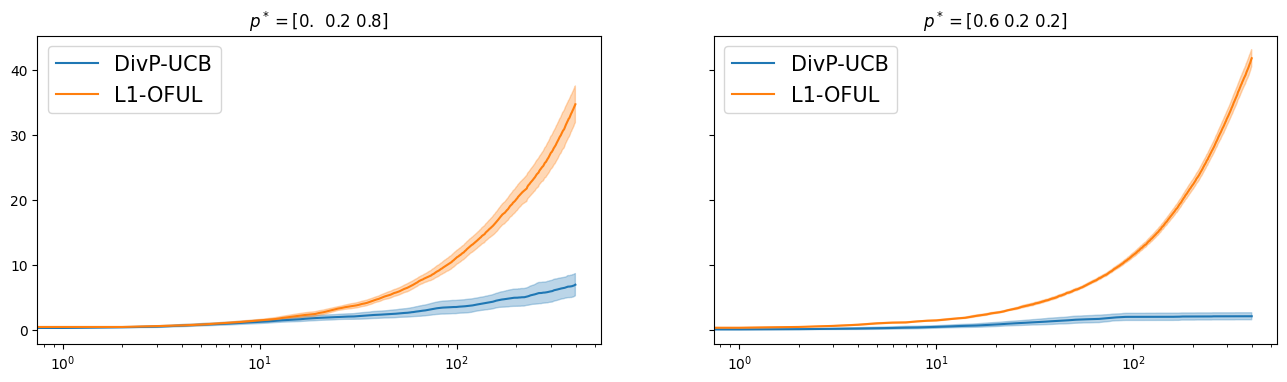

In [49]:
T = 400

alg_list = [
            algs.DivPUCB(K, C, label='DivP-UCB', sig=1/4, noise="gaussian"),
            algs.L1OFUL(K, C, label="L1-OFUL", delta=1 / T),
           ]

N_tests = [20 for _ in band_list]

data_dict={
        'name':'Transition from logarithmic to bounded regret',
        'short_name':'logvbounded_FTL',
        'T':T,
        'N_tests':N_tests,
        'band_list':band_list,
        'alg_list':alg_list,
        'results':None,   
        'folder':'figures/diversity/',
    }

launch(data_dict, checkpoints=False)

plot_and_save(data_dict,
                save_figure=False,
                log_scale=True,
                show_vars=True,
                clean=True
                )


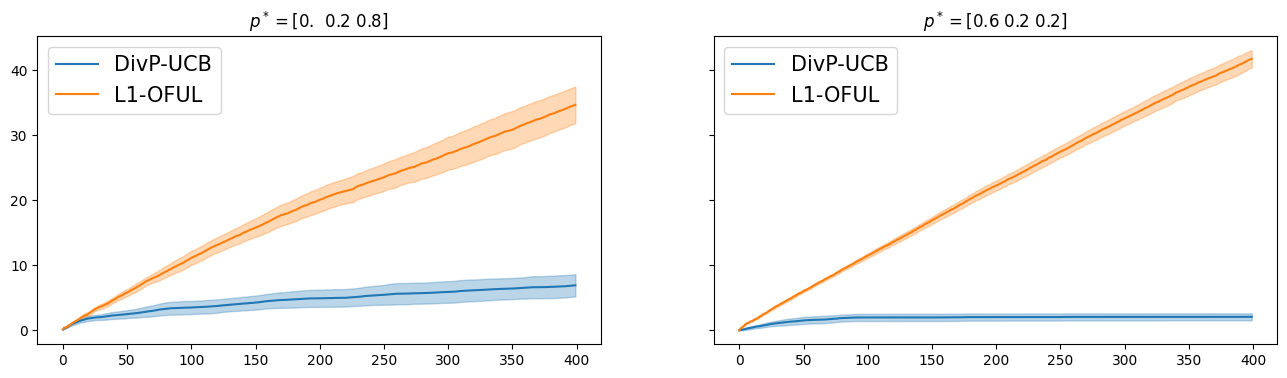

In [51]:

plot_and_save(data_dict,
                save_figure=False,
                log_scale=False,
                show_vars=True,
                clean=True
                )